In [2]:
! pip install pyspark
! pip install findspark
! pip install "numpy<2"
! pip install -U scikit-learn

In [3]:
! pip install pandas


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.6 MB 16.8 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 8.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 8.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 7.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.6 MB 6.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.6 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 6.2 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.6 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 5.7 MB/s eta 0:00:01
   -------------------------------------- - 11.3/11.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 5.4 MB/s eta 0:00:00


In [16]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 16.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 8.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 7.9 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 7.3 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.2 MB/s eta 0:00:00
   --------------

In [17]:
! pip install matplotlib

# Offline-online split

In [2]:
import findspark

findspark.init()

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import (
    LogisticRegression,
    RandomForestClassifier,
    GBTClassifier,
    OneVsRest,
)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from real_time_predict_service.data_transform import (
    clean_dataframe,
    transform_dataframe,
)

In [5]:

df = pd.read_csv("data\diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train_df.to_csv("data/offline.csv",index=False)
test_df.to_csv("data/online.csv", index=False)

# Train dataframe EDA


In [9]:
print("Shape of the dataset:", train_df.shape)
print("\nColumn names:", train_df.columns)
print("\nData Types:\n", train_df.dtypes)

Shape of the dataset: (202944, 22)

Column names: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     fl

In [13]:
print(train_df.head())
print(train_df.tail())

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
31141            0.0     0.0       1.0        1.0  20.0     1.0     0.0   
98230            0.0     0.0       0.0        1.0  34.0     0.0     0.0   
89662            2.0     1.0       1.0        1.0  24.0     0.0     0.0   
208255           0.0     0.0       1.0        1.0  27.0     0.0     0.0   
233415           0.0     0.0       1.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
31141                    0.0           1.0     1.0  ...            1.0   
98230                    0.0           1.0     0.0  ...            1.0   
89662                    0.0           1.0     1.0  ...            1.0   
208255                   0.0           1.0     1.0  ...            1.0   
233415                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
31141           0.0      2.0   

In [14]:
print("\nMissing Values:\n", train_df.isnull().sum())


Missing Values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [15]:
print("\nSummary Statistics:\n", train_df.describe())


Summary Statistics:
         Diabetes_012         HighBP       HighChol      CholCheck  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean        0.297545       0.428212       0.423664       0.962748   
std         0.698850       0.494821       0.494140       0.189378   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  202944.000000  202944.000000  202944.000000         202944.000000   
mean       28.371866       0.442866       0.040578              0.094238   
std         6.612385       0.496726       0.197310              0.292160   
min        12.000000       0.000000       0.000000  

<Axes: >

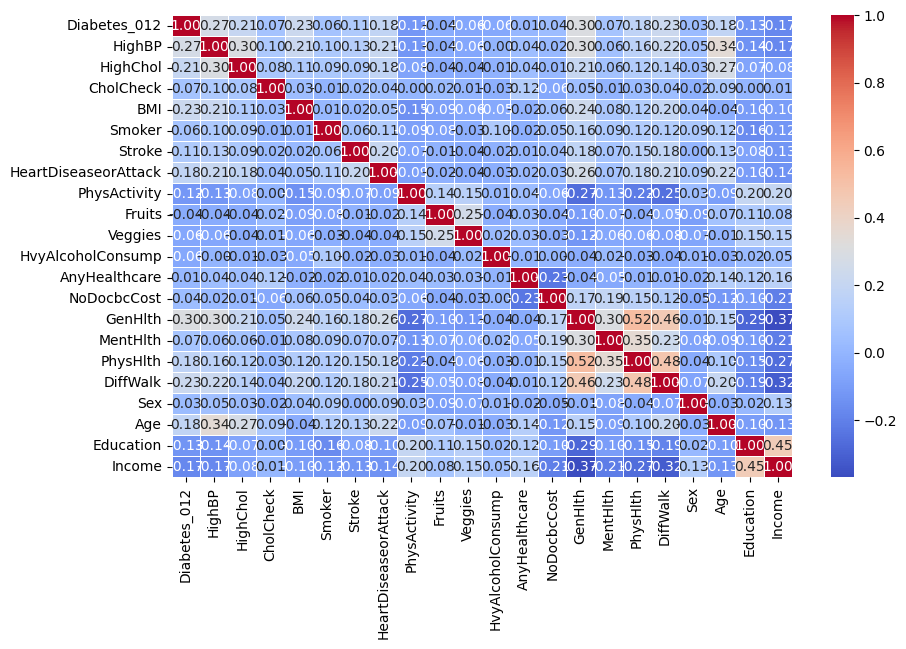

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

no real correlation between the target column and the feature columns

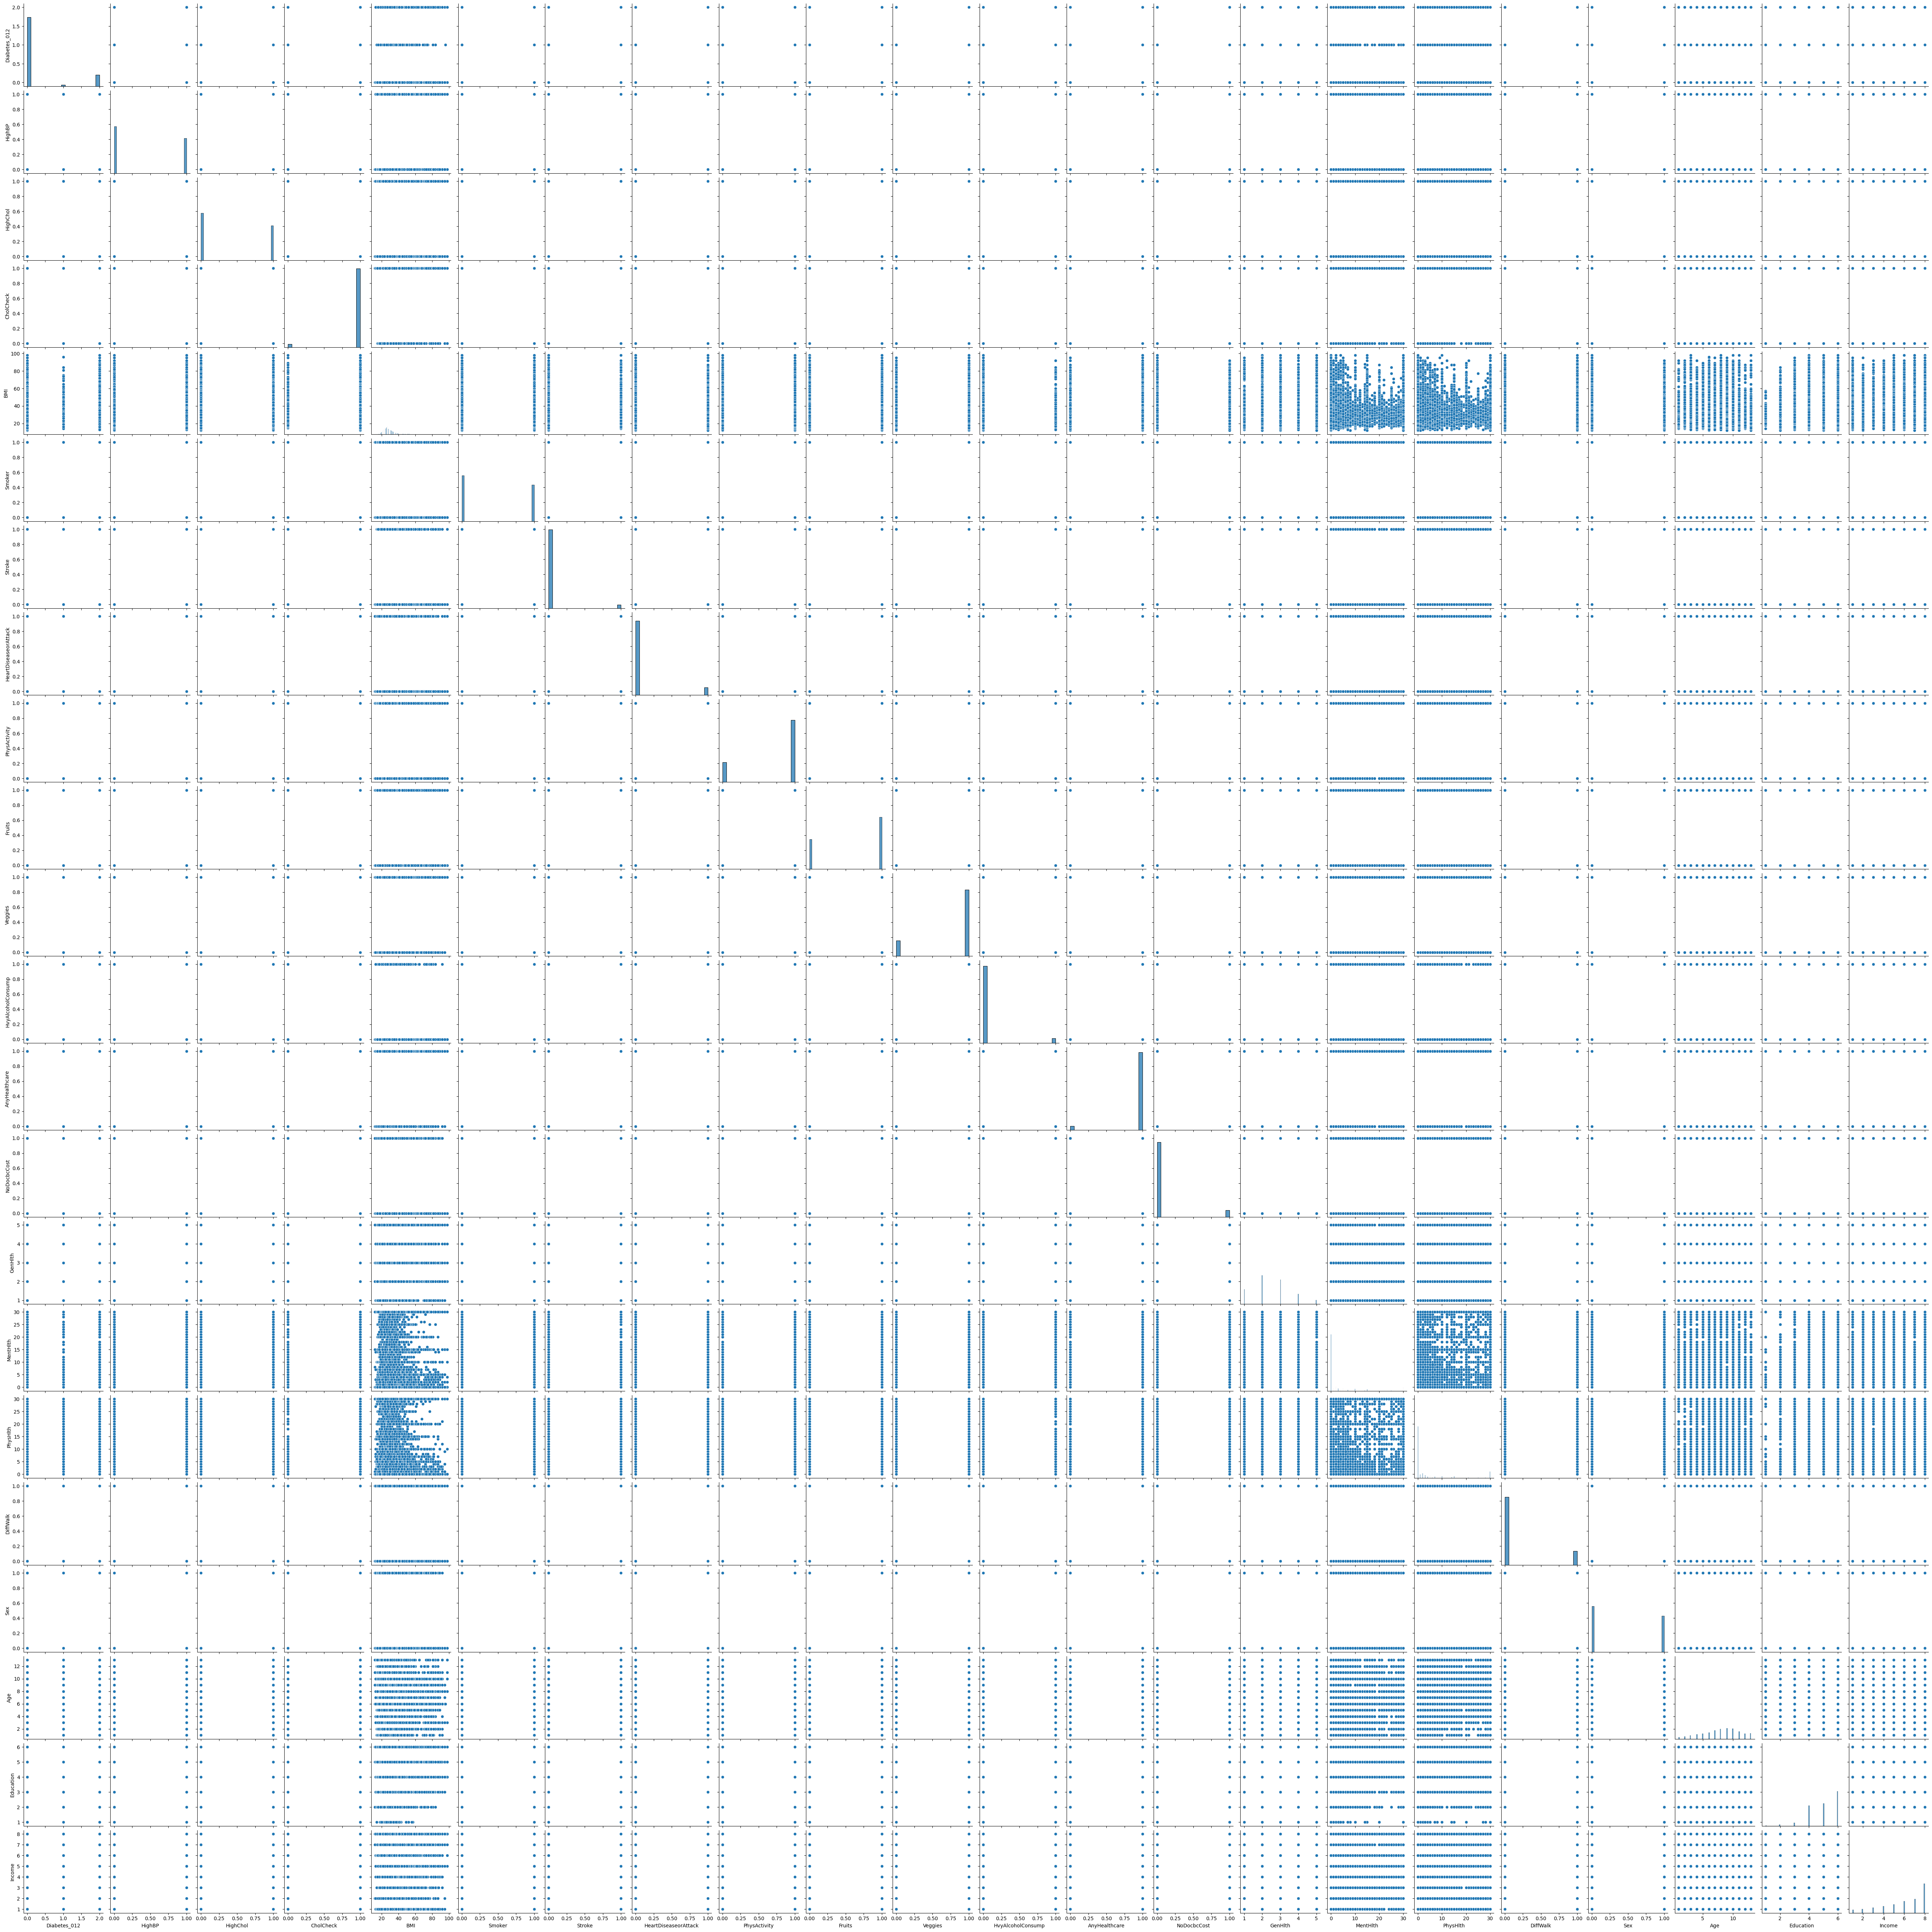

In [22]:
sns.pairplot(train_df)

# Offline Data extraction and transformations


In [6]:
spark = SparkSession.builder.appName("MachineLearningPipeline").getOrCreate()
spark

In [7]:
file_path = "data/offline.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

In [8]:
df.show(5)

+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|         0.0|   0.0|     1.0|      1.0|20.0|   1.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    2.0|     0.0|     0.0|     0.0|1.0|12.0|      6.0|   8.0|
|         0.0|   0.0|     0.0|      1.0|34.0|   0.0|   0.0|                 0.0|         1.0|   0.0|    1.0|              0.0|          1.0|    

In [9]:
df = clean_dataframe(df)

In [10]:
df.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [11]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

In [12]:
train_df = transform_dataframe(train_df)
test_df = transform_dataframe(test_df)

In [13]:
lr = LogisticRegression(featuresCol="features", labelCol="label")

rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=10)

gbt = GBTClassifier(featuresCol="features", labelCol="label", maxIter=10)
ovr = OneVsRest(classifier=gbt)

In [14]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")


param_grid = ParamGridBuilder().build()


cv = CrossValidator(

    estimator=None, 

    estimatorParamMaps=param_grid,
    evaluator=evaluator,

    numFolds=5,
)

In [15]:
models = {"Logistic Regression": lr, "Random Forest": rf, "OVR": ovr}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"Training {name}...")

    cv.setEstimator(model)
        
    cv_model = cv.fit(train_df)

    predictions = cv_model.bestModel.transform(test_df)
    accuracy = evaluator.evaluate(predictions)

    print(f"{name} Accuracy: {accuracy:.3f}\n")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = cv_model.bestModel
        print(f"best model changed to: {name}\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.810

best model changed to: Logistic Regression

Training Random Forest...
Random Forest Accuracy: 0.774

Training OVR...
OVR Accuracy: 0.806



In [20]:
path = f"models/best_model"
best_model.write().overwrite().save(path)

In [16]:
spark.stop()